In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train[0].shape

(28, 28)

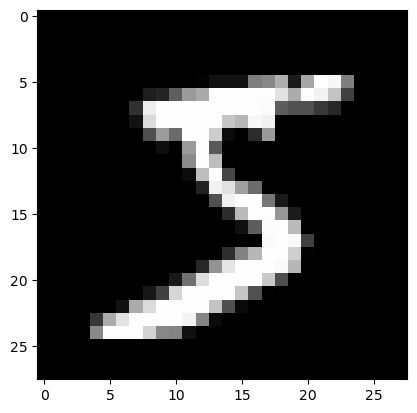

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=2019)

In [12]:
import time
import torch
from torch import nn
from torch.nn import CrossEntropyLoss

In [13]:
cnn = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Dropout(0.25),
                    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Dropout(0.25),
                    nn.Flatten(),
                    nn.Linear(64*7*7, 256),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(256, 10))

In [14]:
batch_size = 1000
train_dataset_1 = torch.utils.data.TensorDataset(torch.tensor(X_train_1, dtype=torch.float32).unsqueeze(1),
                                               torch.tensor(y_train_1, dtype=torch.long))
train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=batch_size)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.long)

In [15]:
loss = CrossEntropyLoss(reduction='none')
lr = 0.01
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

In [16]:
epochs = 30
train_losses = []
test_losses = []
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    for data, target in train_loader_1:
        optimizer.zero_grad()
        output = cnn(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    test_softmax_coefficients = cnn(X_test)
    test_loss = torch.sum(loss(test_softmax_coefficients, y_test)).item()

    training_loss = training_loss / len(y_train_1)
    test_loss = test_loss / len(y_test)
    train_losses.append(training_loss)
    test_losses.append(test_loss)
    
    end = time.time()
    print("Epoch {}: Train_loss {}, Validation_loss {}, Seconds {}".format(epoch, training_loss, test_loss, end-start))

Epoch 0: Train_loss 2.2336304646809895, Validation_loss 1.28801748046875, Seconds 27.52701234817505
Epoch 1: Train_loss 0.7444732065836589, Validation_loss 0.413237841796875, Seconds 28.895325422286987
Epoch 2: Train_loss 0.3651623789469401, Validation_loss 0.2862045166015625, Seconds 29.15233087539673
Epoch 3: Train_loss 0.28874482879638674, Validation_loss 0.2365376220703125, Seconds 28.620546102523804
Epoch 4: Train_loss 0.2388785639444987, Validation_loss 0.20762060546875, Seconds 27.7179856300354
Epoch 5: Train_loss 0.21015754903157552, Validation_loss 0.1887028076171875, Seconds 29.645708799362183
Epoch 6: Train_loss 0.19910125274658202, Validation_loss 0.18932030029296876, Seconds 27.808576107025146
Epoch 7: Train_loss 0.19287299499511718, Validation_loss 0.1575908935546875, Seconds 28.47440528869629
Epoch 8: Train_loss 0.17833940684000651, Validation_loss 0.1671552978515625, Seconds 27.610827207565308
Epoch 9: Train_loss 0.16589717814127605, Validation_loss 0.149681884765625, S

In [17]:
batch_size = 1000
train_dataset_2 = torch.utils.data.TensorDataset(torch.tensor(X_train_2, dtype=torch.float32).unsqueeze(1),
                                               torch.tensor(y_train_2, dtype=torch.long))
train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=batch_size)

In [18]:
epochs = 30
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    for data, target in train_loader_2:
        optimizer.zero_grad()
        output = cnn(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    test_softmax_coefficients = cnn(X_test)
    test_loss = torch.sum(loss(test_softmax_coefficients, y_test)).item()

    training_loss = training_loss / len(y_train_2)
    test_loss = test_loss / len(y_test)
    train_losses.append(training_loss)
    test_losses.append(test_loss)
    
    end = time.time()
    print("Epoch {}: Train_loss {}, Validation_loss {}, Seconds {}".format(epoch, training_loss, test_loss, end-start))

Epoch 0: Train_loss 0.13642990773518882, Validation_loss 0.11100518798828125, Seconds 28.236202239990234
Epoch 1: Train_loss 0.14085291112263998, Validation_loss 0.12274705810546875, Seconds 28.313007354736328
Epoch 2: Train_loss 0.13080013071695964, Validation_loss 0.10889969482421875, Seconds 28.362646341323853
Epoch 3: Train_loss 0.11904139353434245, Validation_loss 0.1136168701171875, Seconds 28.768658876419067
Epoch 4: Train_loss 0.11637297007242839, Validation_loss 0.1206653076171875, Seconds 28.462810039520264
Epoch 5: Train_loss 0.11849192962646485, Validation_loss 0.11649852294921875, Seconds 30.03862953186035
Epoch 6: Train_loss 0.11855235748291015, Validation_loss 0.102427587890625, Seconds 28.3050217628479
Epoch 7: Train_loss 0.10946808090209961, Validation_loss 0.11624505615234375, Seconds 29.026654958724976
Epoch 8: Train_loss 0.10893724568684895, Validation_loss 0.11304599609375, Seconds 28.471028566360474
Epoch 9: Train_loss 0.1188017697652181, Validation_loss 0.1209170

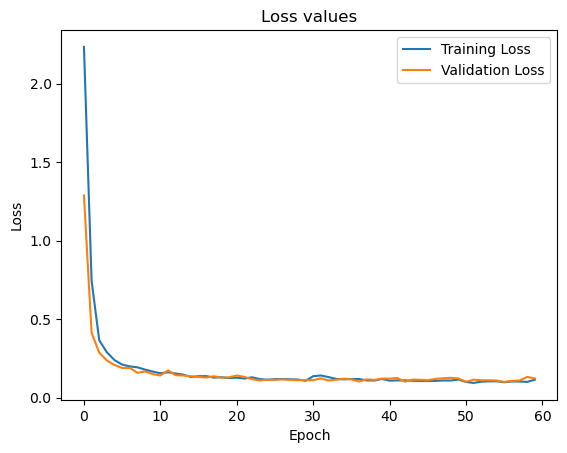

In [19]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [20]:
y_test_softmax_coefficients = cnn(X_test)
y_test_pred_proba = nn.Softmax(dim=1)(test_softmax_coefficients)
y_test_pred = torch.argmax(y_test_pred_proba, dim=1)

In [21]:
y_test = y_test.detach().numpy()
y_test_pred_proba = y_test_pred_proba.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.96      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.93      0.97      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [23]:
confusion_matrix(y_test,y_test_pred)

array([[ 944,    1,    8,    1,    1,    2,   11,    1,    8,    3],
       [   0, 1112,    5,    5,    1,    1,    3,    2,    6,    0],
       [   3,    5,  989,   10,    1,    0,    1,    2,   21,    0],
       [   0,    0,    3,  987,    0,   11,    0,    5,    1,    3],
       [   0,    1,    1,    0,  954,    0,    5,    3,    4,   14],
       [   2,    0,    0,   14,    2,  871,    0,    1,    1,    1],
       [  10,    2,    1,    0,   11,    5,  924,    0,    4,    1],
       [   0,    3,    7,   16,    4,    0,    0,  972,   13,   13],
       [   7,    0,    1,    4,    3,    9,    1,    0,  940,    9],
       [   2,    1,    1,    1,   17,    4,    0,   13,   17,  953]],
      dtype=int64)

Text(0.5, 1.0, 'Receiver Operating Characteristic - PyTorch')

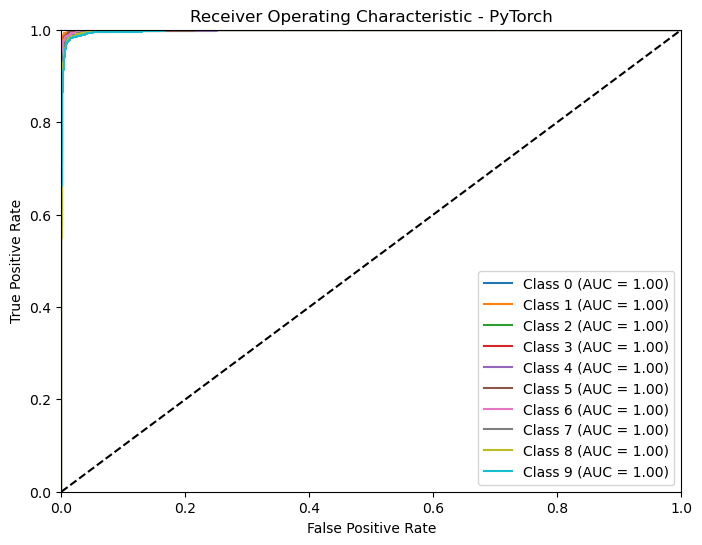

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(sorted(set(y_train)))):
    y_true = (y_test == sorted(set(y_train))[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {sorted(set(y_train))[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - PyTorch')